In [317]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import seaborn as sns

In [333]:
image= cv2.imread('/home/roopesh/Downloads/IMG_1874.jpg')
bgr_HSV= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img= bgr_HSV.copy()

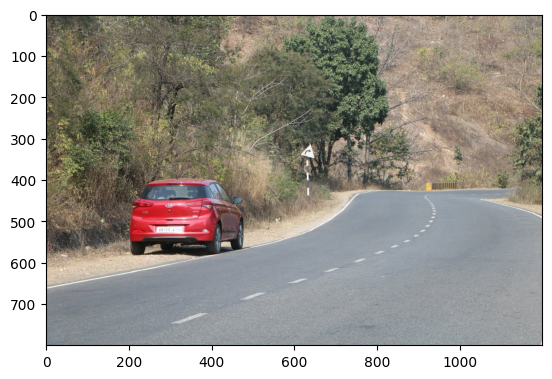

In [334]:
plt.imshow(bgr_HSV)
plt.show()

In [335]:
reshaped_img= (img.reshape(-1,3))
reshaped_img= np.float32(reshaped_img)


In [336]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
# max_iter =10, epsilon =1.0

In [337]:
# flags= cv2.KMEANS_RANDOM_CENTERS 
flags= cv2.KMEANS_PP_CENTERS

In [338]:

df = pd.DataFrame(reshaped_img, columns=['h', 's', 'v'])

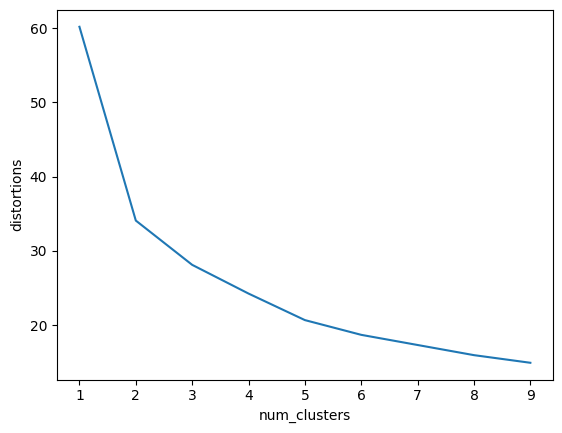

In [340]:
distortions = []
num_clusters = range(1, 10)
 
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df.values.astype(float), i)
    distortions.append(distortion)
 
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
 
# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [ ]:
# openCV_ K-MEANS

In [351]:
clusters = 7

attempts=10
ret,label,center=cv2.kmeans(reshaped_img,clusters,None,criteria,attempts,flags)

In [352]:
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

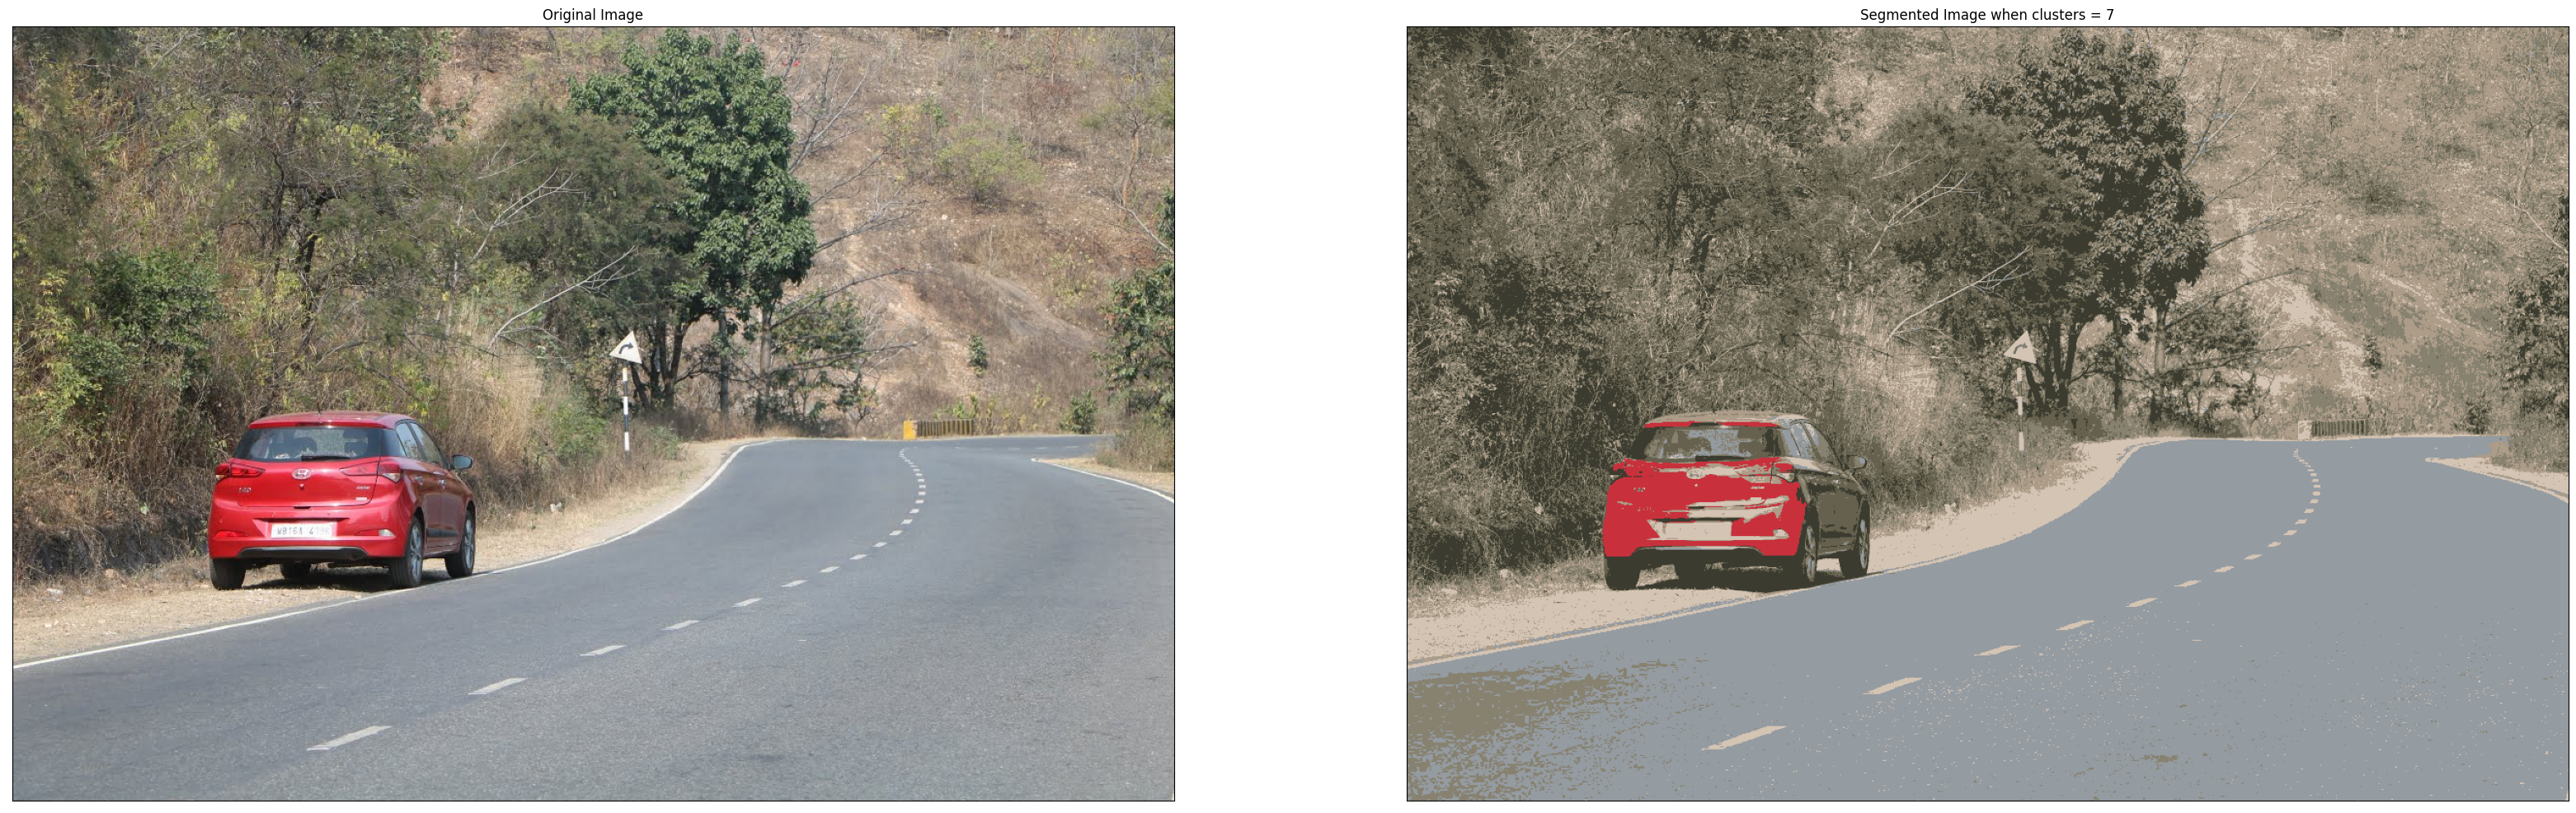

In [353]:
figure_size = 40
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when clusters = %i' % clusters), plt.xticks([]), plt.yticks([])
plt.show()

# Canny Edge Detection

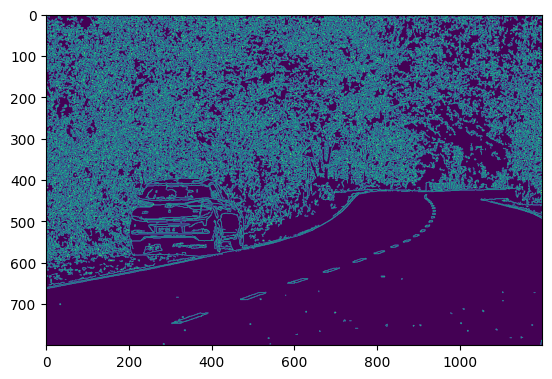

In [350]:
canny = np.uint8(img)
Threshold_1=100
Threshold_2=200
canny_edge = cv2.Canny(canny,Threshold_1,Threshold_2)
plt.imshow(canny_edge)
plt.show()

In [225]:
# slice2Copy = np.uint32(slicecanny)

# REFERENCE

<!--  --
https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html
>

# Image Segmentation Using Gaussian Mixture Model (GMM)